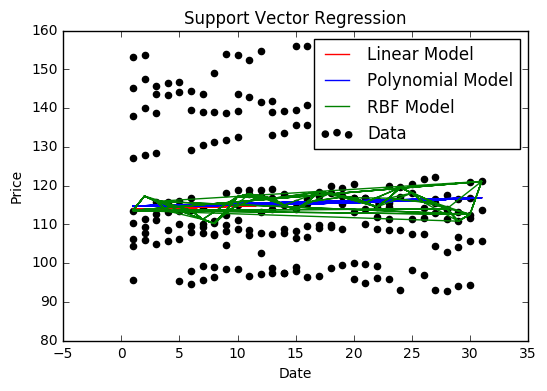

(114.20652173962833, 114.76618604898793, 113.50037977732651)


In [3]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


dates = []
prices = []

def get_data(filename):
	with open(filename,'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader)
		for row in csvFileReader:
			dates.append(int(row[0].split('-')[0]))
			prices.append(float(row[1]))
	return

def predict_prices(dates, prices, x):
	dates = np.reshape(dates,(len(dates),1))

	svr_lin = SVR(kernel='linear', C=1e3)
	svr_poly = SVR(kernel='poly', C=1e3, degree=2)
	svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

	svr_lin.fit(dates,prices)
	svr_poly.fit(dates,prices)
	svr_rbf.fit(dates,prices)

	plt.scatter(dates, prices, color='black', label='Data')
	plt.plot(dates, svr_lin.predict(dates), color='red', label='Linear Model')
	plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial Model')
	plt.plot(dates, svr_rbf.predict(dates), color='green', label='RBF Model')
	plt.xlabel('Date')
	plt.ylabel('Price')
	plt.title('Support Vector Regression')
	plt.legend()
	plt.show()

	return svr_lin.predict(x)[0], svr_poly.predict(x)[0], svr_rbf.predict(x)[0]

get_data('aapl.csv')
predicted_price = predict_prices(dates, prices,5)

print(predicted_price)